# Download the data

In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Take a Quick Look at the Data Structure

- Head
- Info
- Describe
- Histogram on numerical features

In [8]:
# Your code
housing = load_housing_data()

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing.shape

(20640, 10)

In [13]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
from matplotlib import pyplot

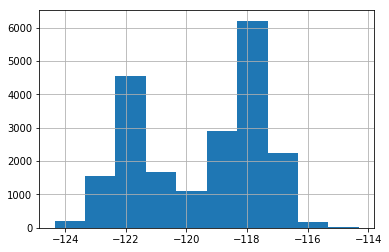

In [14]:
housing.longitude.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F69024208>,
      dtype=object)

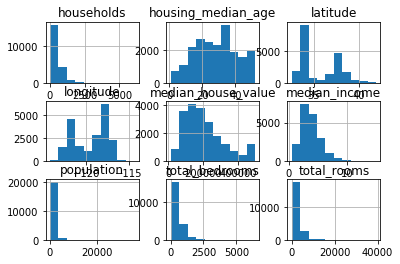

In [17]:
housing.hist()

# Create a Test Set

It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias.

In [18]:
# Your code
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2)

In [19]:
train_set.shape

(16512, 10)

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

In [8]:
housing.plot(kind='scatter')

## Looking for Correlations

In [20]:
# Your code
corr_matrix = housing.corr()

In [21]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Experimenting with Feature Engineering

Try to think of new features more useful than some that already exist. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. 

In [10]:
# Your code
housing['rooms_per_households'] = housing.total_rooms / housing.households
housing['bedrooms_per_rooms'] = housing.total_bedrooms / housing.total_rooms
housing['population_per_household'] = housing.population / housing.households

In [11]:
# Check the correlation with the new features

# Data Preparation

## Variable Encoding

In [24]:
housing = pd.get_dummies(housing)

## Data Cleaning (missing values handling)

In [25]:
# Check a class called Imputer in Scikit Learn with parameter "median"
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit_transform(housing)

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    0.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    0.  ,    0.  ,    0.  ]])

In [27]:
housing_df = pd.DataFrame(imp.fit_transform(housing))
housing_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0.0,0.0,0.0,1.0,0.0


## Feature engineering

In [15]:
# Add the features that you discovered before

In [16]:
housing_df['rooms_per_households'] = housing_df.total_rooms / housing_df.households
housing_df['bedrooms_per_rooms'] = housing_df.total_bedrooms / housing_df.total_rooms
housing_df['population_per_household'] = housing_df.population / housing_df.households

## Feature Scaling

In [17]:
# Check StandardScaler in Scikit Learn
from sklearn.preprocessing import StandardScaler

# Select and Train a Model

In [28]:
y_train = housing.median_house_value
X_train = housing.drop('median_house_value', axis=1)

In [18]:
std = StandardScaler()
housing_df = pd.DataFrame(std.fit_transform(housing_df), columns=housing.columns)

## Training and Evaluating on the Training Set

Try :
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
(check Scikit Learn)


With Performance Metric = RMSE

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_train_pred = reg.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,y_train_pred))

## Model Evaluation Using Cross-Validation

Check from sklearn.model_selection import cross_val_score